<a href="https://colab.research.google.com/github/Meidyt/TubesDA/blob/main/TubesDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CLASSIFICATION

Klasifikasi adalah termasuk dalam supervised learning dimana dataset harus melalui proses training terlebih dahulu. 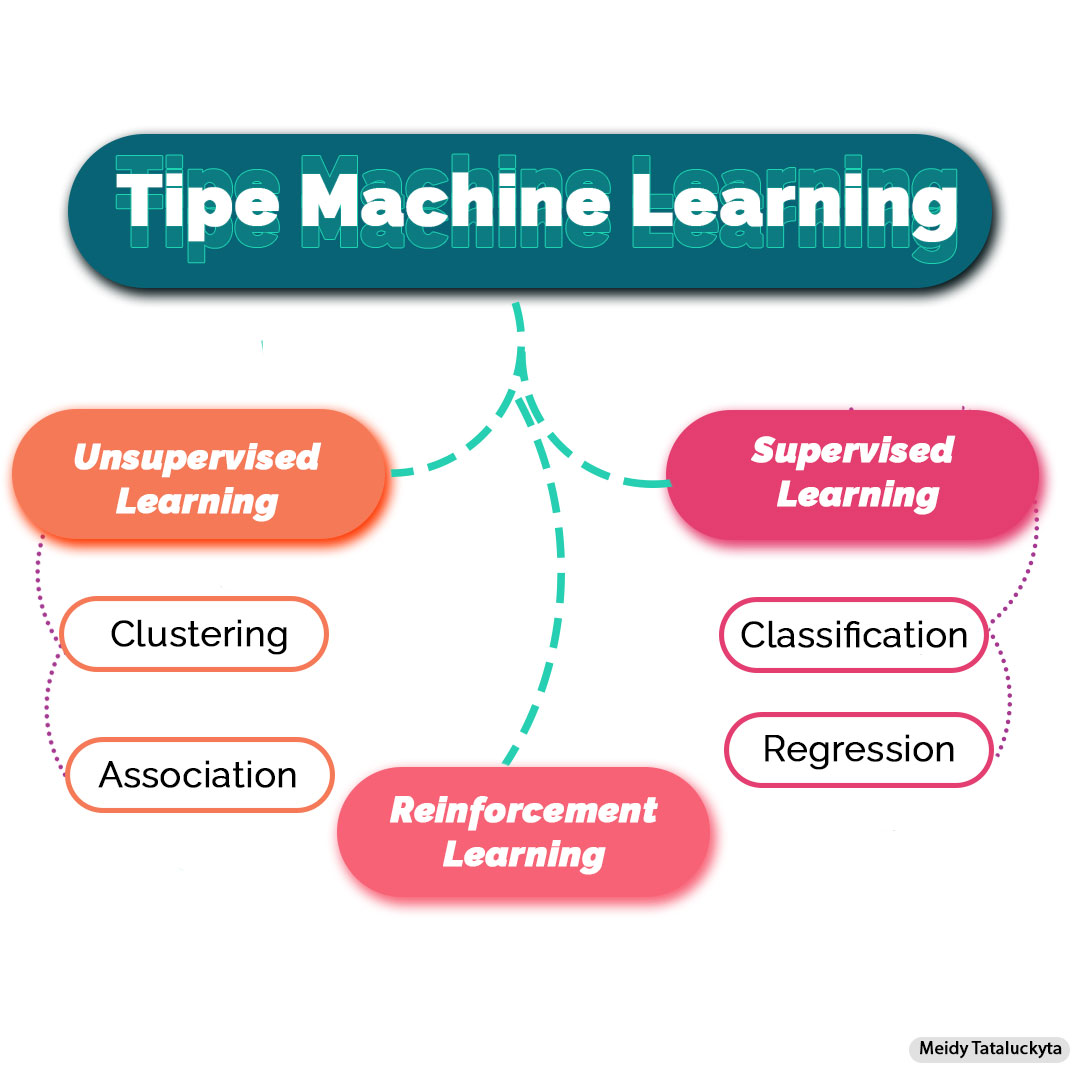

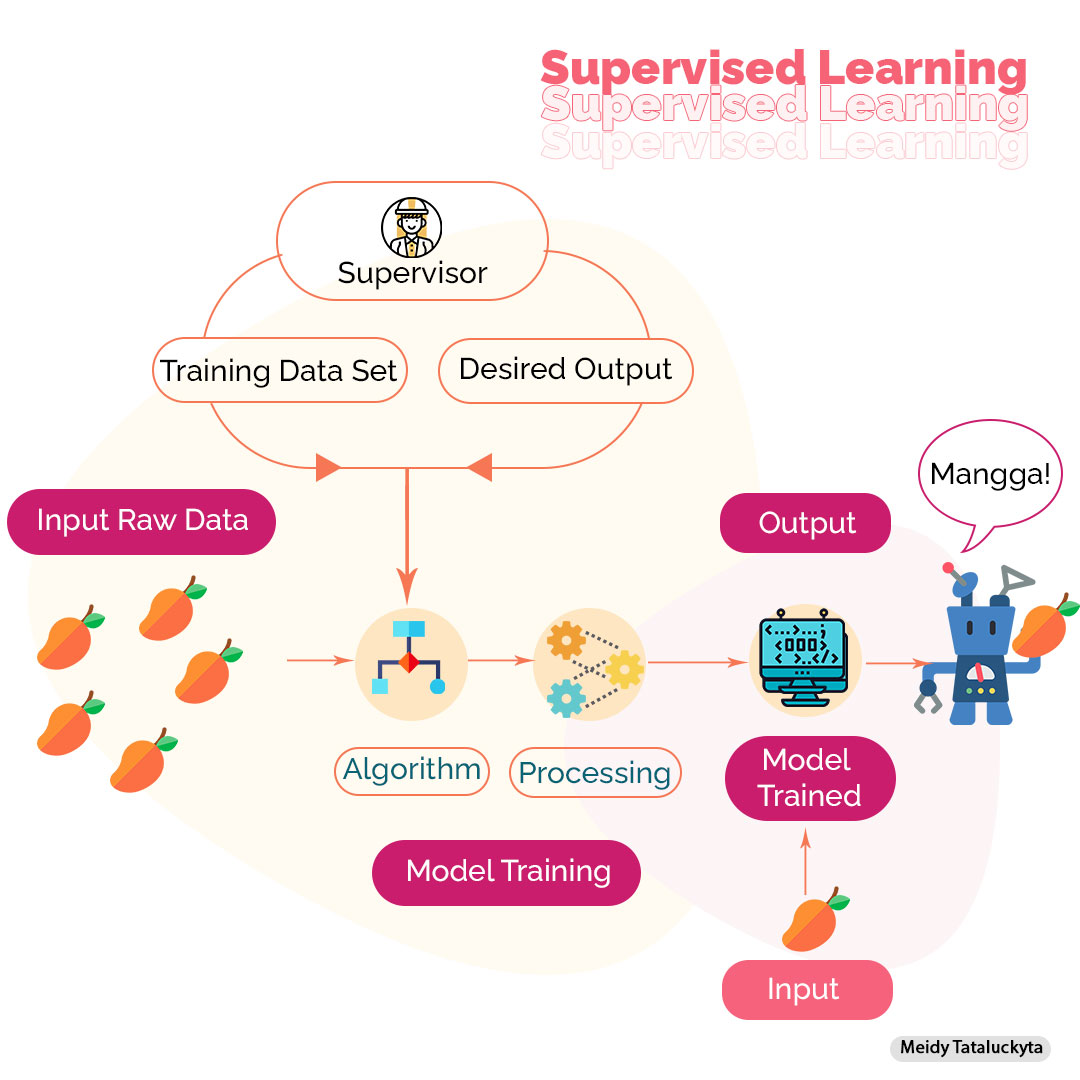

Pada Studi kasus yang diberikan, maka akan dilakukan beberapa model klasifikasi, selain dirasa lebih sederhana, melalui proses ini dapat diketahui manakah model yang memiliki akurasi yang terbaik.

## Import Libraries

In [ ]:
import os
import sys

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import classification_report, f1_score, accuracy_score,\
                            confusion_matrix
                          



In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/Meidyt/TubesDA/main/Dataset.csv', sep = ',')
df
df.head()

,ID,Usia,Melahirkan ke-,Waktu Melahirkan,Tekanan Darah,Gangguan Jantung,Melahirkan Normal
0,1,22,1,0,2,0,1
1,2,26,2,0,1,0,0
2,3,26,2,1,1,0,1
3,4,28,1,0,2,0,1
4,5,22,2,0,1,0,0


## Data Preprocessing

In [ ]:
df.shape

(80, 7)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID                 80 non-null     int64
 1   Usia               80 non-null     int64
 2   Melahirkan ke-     80 non-null     int64
 3   Waktu Melahirkan   80 non-null     int64
 4   Tekanan Darah      80 non-null     int64
 5   Gangguan Jantung   80 non-null     int64
 6   Melahirkan Normal  80 non-null     int64
dtypes: int64(7)
memory usage: 4.5 KB


In [ ]:
df.describe()

,ID,Usia,Melahirkan ke-,Waktu Melahirkan,Tekanan Darah,Gangguan Jantung,Melahirkan Normal
count,80.0000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000
mean,40.5000,27.687500,1.662500,0.637500,1.000000,0.375000,0.425000
std,23.2379,5.017927,0.794662,0.815107,0.711568,0.487177,0.497462
min,1.0000,17.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,20.7500,25.000000,1.000000,0.000000,0.750000,0.000000,0.000000
50%,40.5000,27.000000,1.000000,0.000000,1.000000,0.000000,0.000000
75%,60.2500,32.000000,2.000000,1.000000,1.250000,1.000000,1.000000
max,80.0000,40.000000,4.000000,2.000000,2.000000,1.000000,1.000000


In [ ]:
df.isna().sum()

ID                   0
Usia                 0
Melahirkan ke-       0
Waktu Melahirkan     0
Tekanan Darah        0
Gangguan Jantung     0
Melahirkan Normal    0
dtype: int64

## EDA

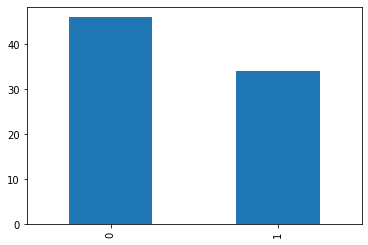

In [ ]:
eda = df['Melahirkan Normal'].value_counts()
eda.plot.bar()

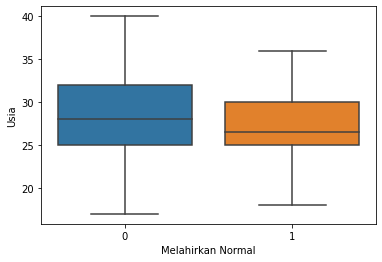

In [ ]:
eda = df[['Usia', 'Melahirkan Normal']]
sns.boxplot(x="Melahirkan Normal", y="Usia", data=eda)

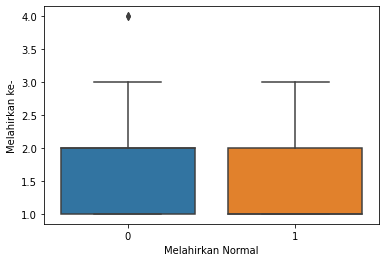

In [ ]:
eda = df[['Melahirkan ke-', 'Melahirkan Normal']]
sns.boxplot(x="Melahirkan Normal", y="Melahirkan ke-", data=eda)

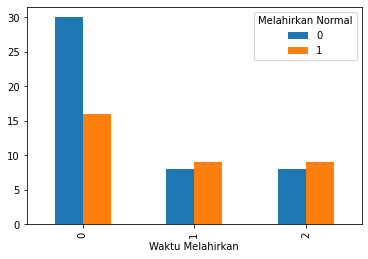

In [ ]:
eda = df[['Melahirkan Normal','Waktu Melahirkan']]
eda = pd.crosstab(eda['Waktu Melahirkan'], eda['Melahirkan Normal'])
eda.plot.bar(stacked=False)

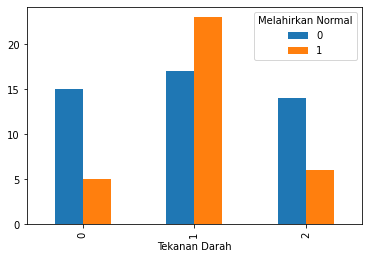

In [ ]:
eda = df[['Melahirkan Normal','Tekanan Darah']]
eda = pd.crosstab(eda['Tekanan Darah'], eda['Melahirkan Normal'])
eda.plot.bar(stacked=False)

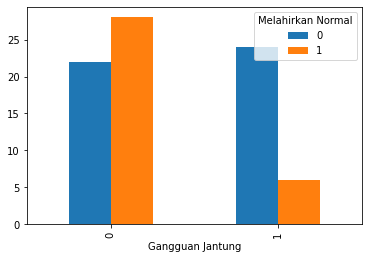

In [ ]:
eda = df[['Melahirkan Normal','Gangguan Jantung']]
eda = pd.crosstab(eda['Gangguan Jantung'], eda['Melahirkan Normal'])
eda.plot.bar(stacked=False)

Beberapa visualisasi data diatas dapat digunakan untuk mempermudah melihat berapa banyak data melahirkan normal dan tidak normal pada beberapa label data lainnya. 

In [ ]:
df.head()

,ID,Usia,Melahirkan ke-,Waktu Melahirkan,Tekanan Darah,Gangguan Jantung,Melahirkan Normal
0,1,22,1,0,2,0,1
1,2,26,2,0,1,0,0
2,3,26,2,1,1,0,1
3,4,28,1,0,2,0,1
4,5,22,2,0,1,0,0


In [ ]:
!pip install category_encoders

In [ ]:
x_columns =['Usia', 'Melahirkan ke-', 'Waktu Melahirkan', 'Tekanan Darah', 'Gangguan Jantung']

In [ ]:
X = df[x_columns]
y = df['Melahirkan Normal']
print(X.shape)



(80, 5)


In [ ]:
from category_encoders.leave_one_out  import LeaveOneOutEncoder

LOO_enc = LeaveOneOutEncoder(cols=['Usia', 'Melahirkan ke-', 'Waktu Melahirkan', 'Tekanan Darah', 'Gangguan Jantung'])
LOO_enc.fit(X,y)

/usr/local/lib/python3.6/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


LeaveOneOutEncoder(cols=['Usia', 'Melahirkan ke-', 'Waktu Melahirkan',
                         'Tekanan Darah', 'Gangguan Jantung'],
                   drop_invariant=False, handle_missing='value',
                   handle_unknown='value', random_state=None, return_df=True,
                   sigma=None, verbose=0)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.2, random_state=12)



In [ ]:
X_train = LOO_enc.transform(X_train)
X_test = LOO_enc.transform(X_test)

## Modeling

>Pada proses modeling, dilakukan terhadap beberapa model klasifikasi yaitu logistic regression, SVM, decision tree, Gaussian Naive Bayes, Random forest classification, dan KNN.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
log_reg = LogisticRegression()
svm = SVC(kernel='rbf', probability=True)
dec_tree = DecisionTreeClassifier()
gau_nb = GaussianNB(var_smoothing=0.0001)
rfc = RandomForestClassifier(n_estimators=150)
knn = KNeighborsClassifier(n_neighbors=5)
grad_bos = GradientBoostingClassifier()

In [ ]:
svm.fit(X_train, y_train)
rfc.fit(X_train, y_train)
knn.fit(X_train, y_train)
dec_tree.fit(X_train, y_train)
gau_nb.fit(X_train, y_train)
log_reg.fit(X_train, y_train)
grad_bos.fit(X_train, y_train)
log_reg.fit(X_train, y_train)
grad_bos.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
print(f'svm score : {svm.score(X_test,y_test)}')
print(f'random forest score : {rfc.score(X_test,y_test)}')
print(f'KNN score : {knn.score(X_test,y_test)}')
print(f'DecisionTree score : {dec_tree.score(X_test,y_test)}')
print(f'Gaussian NB score : {gau_nb.score(X_test,y_test)}')
print(f'Logistic Regression score : {log_reg.score(X_test,y_test)}')
print(f'Gradient Boosting score : {grad_bos.score(X_test,y_test)}')

svm score : 0.75
random forest score : 0.8125
KNN score : 0.75
DecisionTree score : 0.8125
Gaussian NB score : 0.875
Logistic Regression score : 0.875
Gradient Boosting score : 0.6875


In [ ]:
y_pred_svm = svm.predict(X_test)
y_pred_rfc = rfc.predict(X_test)
y_pred_knn = knn.predict(X_test)
y_pred_dec_tree = dec_tree.predict(X_test)
y_pred_gau_nb = gau_nb.predict(X_test)
y_pred_log_reg = log_reg.predict(X_test)
y_pred_grad_bos = grad_bos.predict(X_test)

In [ ]:
print(f'F Score of SVM : {f1_score(y_test, y_pred_svm)}')
print(f'F Score of RFC: {f1_score(y_test, y_pred_rfc)}')
print(f'F Score of KNN : {f1_score(y_test, y_pred_knn)}')
print(f'F Score of DECTREE : {f1_score(y_test, y_pred_dec_tree)}')
print(f'F Score of GAUSNB : {f1_score(y_test, y_pred_gau_nb)}')
print(f'F Score of LOGREG : {f1_score(y_test, y_pred_log_reg)}')
print(f'F Score of GRADBOS : {f1_score(y_test, y_pred_grad_bos)}')

F Score of SVM : 0.6
F Score of RFC: 0.4
F Score of KNN : 0.5
F Score of DECTREE : 0.5714285714285715
F Score of GAUSNB : 0.8
F Score of LOGREG : 0.75
F Score of GRADBOS : 0.28571428571428575


In [ ]:
from sklearn.model_selection import cross_val_score

cv = 3
print(f'CV Score of SVM : {cross_val_score(svm, X_train, y_train, cv=cv, n_jobs=-1)}')
print(f'CV Score of RFC: {cross_val_score(rfc, X_train, y_train, cv=cv, n_jobs=-1)}')
print(f'CV Score of KNN : {cross_val_score(knn, X_train, y_train, cv=cv, n_jobs=-1)}')
print(f'CV Score of DECTREE : {cross_val_score(dec_tree, X_train, y_train, cv=cv, n_jobs=-1)}')
print(f'CV Score of GAUSNB : {cross_val_score(gau_nb, X_train, y_train,cv=cv, n_jobs=-1)}')
print(f'CV Score of LOGREG : {cross_val_score(log_reg, X_train, y_train, cv=cv, n_jobs=-1)}')
print(f'CV Score of GRADBOS : {cross_val_score(grad_bos, X_train, y_train, cv=cv, n_jobs=-1)}')

CV Score of SVM : [0.77272727 0.71428571 0.76190476]
CV Score of RFC: [0.68181818 0.52380952 0.66666667]
CV Score of KNN : [0.77272727 0.57142857 0.66666667]
CV Score of DECTREE : [0.72727273 0.52380952 0.61904762]
CV Score of GAUSNB : [0.77272727 0.71428571 0.71428571]
CV Score of LOGREG : [0.68181818 0.71428571 0.71428571]
CV Score of GRADBOS : [0.72727273 0.61904762 0.66666667]


>CV= Cross validation membagi data menjadi beberapa bagian, pada kali ini dibagi menjadi 3 fold. Hasil dari akurasi CV pada logistic regression adalah 68%, 71% dan 71%. 

In [ ]:
print(classification_report(y_test, y_pred_log_reg))


              precision    recall  f1-score   support

           0       0.92      0.92      0.92        12
           1       0.75      0.75      0.75         4

    accuracy                           0.88        16
   macro avg       0.83      0.83      0.83        16
weighted avg       0.88      0.88      0.88        16



Berdasarkan report diatas, dapat dilihat jika akurasi dari logistic regression adalah : logistic regression memiliki tingkat akurasi secara keseluruhan adalah 88% dengan nilai akurasi mengklasifikasikan ke kelas 0 yaitu 92 % dan kelas 1 yaitu 75%


## Evaluation

### Confusion Matrix

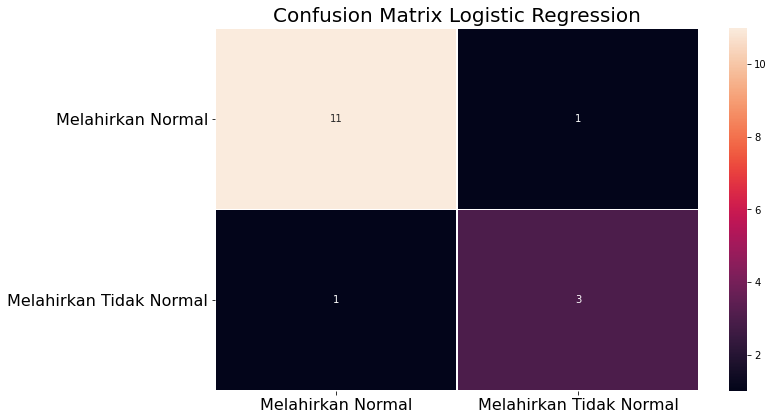

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred_log_reg)
f, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", linewidths=.5, ax=ax)
plt.title("Confusion Matrix Logistic Regression", fontsize=20)
plt.subplots_adjust(left=0.15, right=0.99, bottom=0.15, top=0.99)
ax.set_yticks(np.arange(conf_matrix.shape[0]) + 0.5, minor=False)
ax.set_xticklabels(['Melahirkan Normal', 'Melahirkan Tidak Normal'], fontsize=16)
ax.set_yticklabels(['Melahirkan Normal', 'Melahirkan Tidak Normal'], fontsize=16, rotation=360)
plt.show()

> Berdasarkan confusion matrix dapat dilihat seberapa tepatkah model ini mengklasifikasikan data. 11 data melahirkan normal diklasifikasikan dengan benar dan 1 nya salah serta 3 data melahirkan tidak normal diklasifikasikan dengan benar dan 1 data diklasifikasikan salah. 

### Log Loss

In [ ]:
from sklearn.metrics import log_loss
log_loss(y_test, y_pred_log_reg_proba)

0.5270724822679563

### ROC Curve

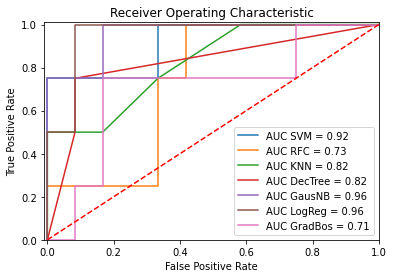

In [ ]:
from sklearn import metrics

y_pred_svm_proba = svm.predict_proba(X_test)
y_pred_rfc_proba = rfc.predict_proba(X_test)
y_pred_knn_proba = knn.predict_proba(X_test)
y_pred_dec_tree_proba = dec_tree.predict_proba(X_test)
y_pred_gau_nb_proba = gau_nb.predict_proba(X_test)
y_pred_log_reg_proba = log_reg.predict_proba(X_test)
y_pred_grad_bos_proba = grad_bos.predict_proba(X_test)

y_preds_svm = y_pred_svm_proba[:,1]
y_preds_rfc = y_pred_rfc_proba[:,1]
y_preds_knn = y_pred_knn_proba[:,1]
y_preds_dectree = y_pred_dec_tree_proba[:,1]
y_preds_gaunb = y_pred_gau_nb_proba[:,1]
y_preds_logreg = y_pred_log_reg_proba[:,1]
y_preds_gradbos = y_pred_grad_bos_proba[:,1]

fpr_svm, tpr_svm, threshold_svm = metrics.roc_curve(y_test, y_preds_svm)
roc_auc_svm = metrics.auc(fpr_svm, tpr_svm)
fpr_rfc, tpr_rfc, threshold = metrics.roc_curve(y_test, y_preds_rfc)
roc_auc_rfc = metrics.auc(fpr_rfc, tpr_rfc)
fpr_knn, tpr_knn, threshold = metrics.roc_curve(y_test, y_preds_knn)
roc_auc_knn = metrics.auc(fpr_knn, tpr_knn)
fpr_dectree, tpr_dectree, threshold = metrics.roc_curve(y_test, y_preds_dectree)
roc_auc_dectree = metrics.auc(fpr_dectree, tpr_dectree)
fpr_gaunb, tpr_gaunb, threshold = metrics.roc_curve(y_test, y_preds_gaunb)
roc_auc_gaunb = metrics.auc(fpr_gaunb, tpr_gaunb)
fpr_logreg, tpr_logreg, threshold = metrics.roc_curve(y_test, y_preds_logreg)
roc_auc_logreg = metrics.auc(fpr_logreg, tpr_logreg)
fpr_gradbos, tpr_gradbos, threshold = metrics.roc_curve(y_test, y_preds_gradbos)
roc_auc_grabos = metrics.auc(fpr_gradbos, tpr_gradbos)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr_svm, tpr_svm, label = 'AUC SVM = %0.2f' % roc_auc_svm)
plt.plot(fpr_rfc, tpr_rfc, label = 'AUC RFC = %0.2f' % roc_auc_rfc)
plt.plot(fpr_knn, tpr_knn, label = 'AUC KNN = %0.2f' % roc_auc_knn)
plt.plot(fpr_dectree, tpr_dectree, label = 'AUC DecTree = %0.2f' % roc_auc_dectree)
plt.plot(fpr_gaunb, tpr_gaunb, label = 'AUC GausNB = %0.2f' % roc_auc_gaunb)
plt.plot(fpr_logreg, tpr_logreg, label = 'AUC LogReg = %0.2f' % roc_auc_logreg)
plt.plot(fpr_gradbos, tpr_gradbos, label = 'AUC GradBos = %0.2f' % roc_auc_grabos)

plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1])
plt.ylim([0, 1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

>Kurva ROC adalah cara lain selain confusion matrix untuk mengukur performansi suatu model. Pada kurva ROC dapat dilihat jika logistic regression memiliki nilai TPR lebih tinggi dibandingkan dengan model lainnya sehingga nilai AUC nya juga tinggi yaitu 96%. 